# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The Traveling Salesman Problem

__Goal:__ Find the shortest tour visiting each of $n$ cities once. Given are pairwise distances between cities. 

__State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  with the order in which the cities are visited (a permutation).

__Objective function:__ Minimize the tour length.

The optimization problem is to find the optimal arrangement $a^*$ of $n$ queens on the board:

$$\mathrm{argmin}_\pi [ \mathrm{tourLength}(\pi) ]$$

$$\text{s.t.}\ \pi \ \text{is a valid permutation vector}$$

__Local moves:__ Exchange two cities in the order.

## Helper functions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('precision', 2)

# make the results repeatable
np.random.seed(1234)

[4, 3, 1, 8, 0, 5, 7, 2, 9, 6]

In [ ]:
def random_tour(n):
    """Create a random tour"""
    
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

In [2]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a 
    pairwise Euclidean distance matrix.
    """
    
    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })
    
    dist = squareform(pdist(pos))
    
    return({"pos": pos, "dist": dist})
    
tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [3]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""
    
    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()
    
    tl = 0
    dist = tsp["dist"]
    
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    
    tl += dist[tour[-1], tour[0]]
    
    return(tl)
        
tour = random_tour(10)
tour_length(tsp, tour)

4.2613499004861914

Tour length: 4.26


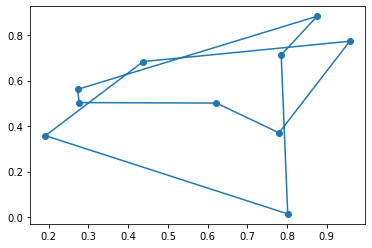

In [4]:
def show_tsp(tsp, tour = None):  
    """display the traveling salesman problem and a tour."""
    
    pos = tsp["pos"]
    
    plt.scatter(pos["x"], pos["y"])
    
    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()
        
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")
        
        pos_ = pos.reindex(tour)
        pos_ = pos_.append(pos_.head(1))
        plt.plot(pos_["x"], pos_["y"])
    
    plt.show()
    
show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [5]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

/opt/conda/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [6]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
function (x) 
UseMethod("t")
<bytecode: 0x55b7dcdb3ea0>
<environment: namespace:base>
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


Tour length: 2.76


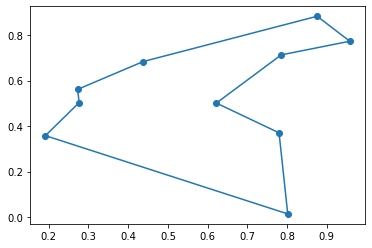

In [7]:
show_tsp(tsp, tour)

How long does it take to solve the problem?

In [8]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr     min       lq     mean   median       uq     max neval
 tsp <- TSP(d) 288.533 300.2435 328.9891 320.6895 346.8475 658.513   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [9]:
# Code goes here

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

In [10]:
# Code goes here

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

In [11]:
# Code goes here

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

I implement two different local moves. Swapping two cities and reversing the subtour between two cities (which is better).

In [12]:
def move_swap(tour):
    new_tour = tour.copy()
    
    # np.random.randint is inclusive lower limit and exclusive upper limit
    [a, b] = np.random.randint(0, len(tour), 2)
    #print(f"a={a}, b={b}")
    
    new_tour[a] = tour[b]
    new_tour[b] = tour[a]
    return(new_tour)

print(move_swap(list(range(10))))
print(move_swap(list(range(10))))
print(move_swap(list(range(10))))

[7, 1, 2, 3, 4, 5, 6, 0, 8, 9]
[9, 1, 2, 3, 4, 5, 6, 7, 8, 0]
[0, 1, 3, 2, 4, 5, 6, 7, 8, 9]


In [13]:
def move_swap_neighbors(tour):
    new_tour = tour.copy()
    
    a = np.random.randint(0, len(tour)-1, 1)[0]
    if a > 0: b = a+1
    else: b = len(tour)-1  
    #print(f"a={a}, b={b}")
    
    new_tour[a] = tour[b]
    new_tour[b] = tour[a]
    return(new_tour)

print(move_swap_neighbors(list(range(10))))
print(move_swap_neighbors(list(range(10))))
print(move_swap_neighbors(list(range(10))))

[0, 1, 2, 4, 3, 5, 6, 7, 8, 9]
[0, 2, 1, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 4, 3, 5, 6, 7, 8, 9]


In [14]:
def move_reverse(tour):
    new_tour = tour.copy()
    
    ab = np.random.randint(0, len(tour)+1, 2)
    ab.sort()
    #print(f"a={ab[0]}, b={ab[1]}")
        
    new_tour[ab[0]:ab[1]] = new_tour[ab[0]:ab[1]][::-1]
    return(new_tour)

print(move_reverse(list(range(10))))
print(move_reverse(list(range(10))))
print(move_reverse(list(range(10))))

[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[0, 1, 2, 6, 5, 4, 3, 7, 8, 9]
[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]


I don't know what the optimal tour is so I run the algorithm for `max_steps` steps, but stop if there is no improvement for `stop_after` steps.

In [15]:
def FCHC(tsp, tour = None, local_move_method = move_swap, 
         max_steps = 1000000, stop_after = 1000, verbose = True):
    
    n = len(tsp['pos'])
    
    # 1. initialize current tour
    # current tour = initial tour (random if no tour is given)
    if not tour is None:
        current_tour = tour
    else:
        current_tour = random_tour(n)
    
    
    # initial tour length
    current_length = tour_length(tsp, tour)    
    if verbose: print(f"initial tour length: {current_length}")
    
    # step when we last improved the length
    last_improvement_step = 0
    
    # 2. repeat local moves
    for step in range(max_steps):
        
        new_tour = local_move_method(current_tour)
        new_length = tour_length(tsp, new_tour)
        
        # check if the new tour is better   
        if new_length < current_length: 
            current_tour = new_tour
            current_length = new_length
            last_improvement_step = step
            if verbose: print(f"step: {step} - new tour length: {current_length}")
    
        # stop if we did not improve for stop_after steps
        if step - last_improvement_step > stop_after: 
            if verbose: print(f"step: {step} - no improvement for {stop_after} steps.")
            break
      
    return(current_tour)

Tour length: 4.62


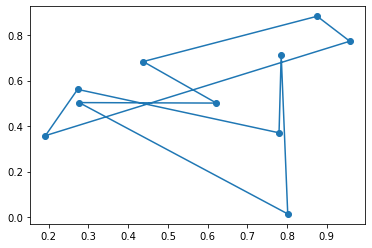

In [16]:
initial_tour = random_tour(len(tsp['pos']))
show_tsp(tsp, initial_tour)

initial tour length: 4.615982954440017
step: 1 - new tour length: 4.407432813373175
step: 2 - new tour length: 4.100023485662441
step: 6 - new tour length: 4.075026534166581
step: 11 - new tour length: 4.005222247672543
step: 13 - new tour length: 3.938092119720473
step: 16 - new tour length: 3.620590909023431
step: 17 - new tour length: 3.588119072526838
step: 24 - new tour length: 3.239371390157988
step: 27 - new tour length: 3.066130423374765
step: 48 - new tour length: 2.857950605284202
step: 57 - new tour length: 2.786516989419932
step: 1058 - no improvement for 1000 steps.
CPU times: user 39.1 ms, sys: 10.1 ms, total: 49.2 ms
Wall time: 41.8 ms
Tour length: 2.79


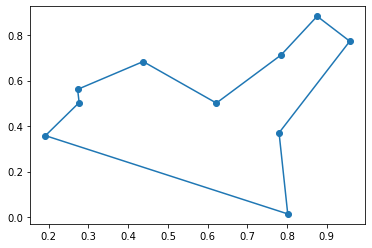

In [17]:
%time tour = FCHC(tsp, initial_tour, local_move_method = move_swap)
show_tsp(tsp, tour)

initial tour length: 4.615982954440017
step: 1 - new tour length: 4.508171471020914
step: 2 - new tour length: 4.269409916203944
step: 9 - new tour length: 4.2665652339911455
step: 11 - new tour length: 4.139868099009009
step: 22 - new tour length: 4.104466301785605
step: 33 - new tour length: 4.082739741760458
step: 1034 - no improvement for 1000 steps.
CPU times: user 38.9 ms, sys: 9.91 ms, total: 48.8 ms
Wall time: 43.4 ms
Tour length: 4.08


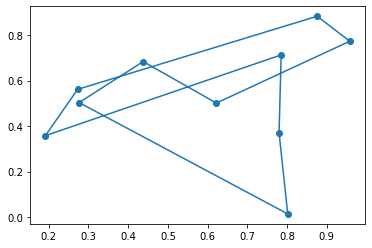

In [18]:
%time tour = FCHC(tsp, initial_tour, local_move_method = move_swap_neighbors)
show_tsp(tsp, tour)

initial tour length: 4.615982954440017
step: 0 - new tour length: 4.58546193571947
step: 5 - new tour length: 4.495117821366729
step: 8 - new tour length: 4.369670390225967
step: 10 - new tour length: 4.242973255243831
step: 19 - new tour length: 4.111164975697019
step: 27 - new tour length: 3.486610788292344
step: 29 - new tour length: 3.4662250305034727
step: 32 - new tour length: 3.0629339935015585
step: 47 - new tour length: 2.9682371096757763
step: 80 - new tour length: 2.8810894251962416
step: 1081 - no improvement for 1000 steps.
CPU times: user 39.1 ms, sys: 0 ns, total: 39.1 ms
Wall time: 37.3 ms
Tour length: 2.88


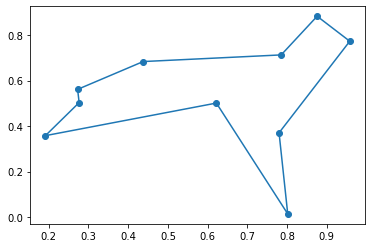

In [19]:
%time tour = FCHC(tsp, initial_tour, local_move_method = move_reverse)
show_tsp(tsp, tour)

Compare the two types of local moves

In [20]:
N = 100 # replications
n = 20 # number of cities

results = { 
    'swap' : np.zeros(shape = [N]),
    'swap_neighbors' : np.zeros(shape = [N]),
    'reverse' : np.zeros(shape = [N]) 
}

for i in range(N):
    tsp = random_tsp(n)
    initial_tour = random_tour(n)
    
    results['swap'][i] = tour_length(tsp, 
        FCHC(tsp, initial_tour, local_move_method = move_swap, verbose = False))
    
    results['swap_neighbors'][i] = tour_length(tsp, 
        FCHC(tsp, initial_tour, local_move_method = move_swap_neighbors, verbose = False))
    
    results['reverse'][i] = tour_length(tsp, 
        FCHC(tsp, initial_tour, local_move_method = move_reverse, verbose = False))

    swap  swap_neighbors  reverse
0   5.01            7.22     3.96
1   4.87            9.38     3.92
2   4.84            8.62     3.96
3   4.62            8.53     4.12
4   5.42            9.73     4.17
..   ...             ...      ...
95  5.27            7.39     4.54
96  4.65            8.76     4.32
97  5.01            8.41     4.19
98  4.70            8.22     4.21
99  4.81            7.87     4.26

[100 rows x 3 columns]
swap              4.66
swap_neighbors    8.09
reverse           4.00
dtype: float64


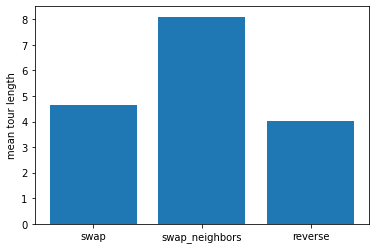

In [21]:
# compare averages
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame(results)
print(results)

means = np.mean(results, axis = 0)
print(means)

plt.bar(means.keys(), means)
plt.ylabel("mean tour length")
plt.show()


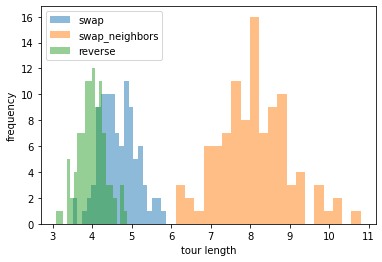

In [22]:
# histogram

plt.hist(results['swap'], bins = 20, alpha = .5)
plt.hist(results['swap_neighbors'], bins = 20, alpha = .5)
plt.hist(results['reverse'], bins = 20, alpha = .5)
plt.xlabel("tour length")
plt.ylabel("frequency")
plt.legend(labels = ["swap", "swap_neighbors", "reverse"])
plt.show()

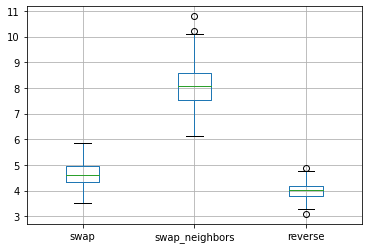

In [23]:
# boxplot (from pandas.DataFrame)

results.boxplot()

In [24]:
# is reverse better than swap?
# perform a paired t-test

from scipy import stats

stats.ttest_rel(results['swap'], results['reverse'])

Ttest_relResult(statistic=14.975338819745701, pvalue=3.480291025025149e-27)

## Simulated Annealing [2 Points]

In [25]:
# Code goes here

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [26]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.13637542724609375 milliseconds


In [27]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [28]:
# Code goes here